In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

The file contains more than 17 million rows, with file size more than 4GB. For  exploratory data analysis, here I'm starting with reading 1 million rows. 

In [3]:
df = pd.read_csv('Transportation_Network_Providers_-_Trips.csv', nrows=1000000)

In [4]:
df.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,022ad3b7f1320d4e52cce3d5931eb0a0cee16c48,11/01/2018 08:45:00 AM,11/01/2018 09:30:00 AM,3140.0,38.5,NaN,1.703198e+10,NaN,56.0,47.5,...,9.1,66.6,False,1,NaN,NaN,NaN,41.785999,-87.750934,POINT (-87.7509342894 41.785998518)
1,0377167460a4d5d5e015c642b460e56ac88dab71,11/01/2018 02:00:00 AM,11/01/2018 02:15:00 AM,1031.0,5.3,NaN,NaN,70.0,NaN,10.0,...,2.5,12.5,False,1,41.745758,-87.708366,POINT (-87.7083657043 41.7457577128),NaN,NaN,NaN
2,03a2ac30a46af881e6a2e6af06a3a779b67c0802,11/01/2018 08:15:00 PM,11/01/2018 09:15:00 PM,4125.0,49.9,1.703108e+10,NaN,8.0,NaN,62.5,...,3.8,66.3,False,1,41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),NaN,NaN,NaN
3,03fe17b0509941aa04744e9e4478ed5ded56b2eb,11/01/2018 03:45:00 AM,11/01/2018 04:15:00 AM,1229.0,11.7,1.703183e+10,NaN,22.0,NaN,7.5,...,2.5,10.0,True,3,41.916005,-87.675095,POINT (-87.6750951155 41.9160052737),NaN,NaN,NaN
4,040590c0bf5b22f8ccf7d8f19873c612bebfd480,11/01/2018 05:00:00 PM,11/01/2018 06:00:00 PM,3383.0,12.3,NaN,1.703184e+10,NaN,32.0,27.5,...,2.5,30.0,False,1,NaN,NaN,NaN,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)


In [5]:
# drop the columns not needed to save space
df = df.drop(columns=['Pickup Census Tract', 'Dropoff Census Tract', 'Pickup Community Area', \
                      'Dropoff Community Area', 'Trip End Timestamp', \
                      'Pickup Centroid Location', 'Dropoff Centroid Location'])

In [6]:
df = df.loc[df['Pickup Centroid Latitude'].notnull()]

In [7]:
df.head()

,Trip ID,Trip Start Timestamp,Trip Seconds,Trip Miles,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
1,0377167460a4d5d5e015c642b460e56ac88dab71,11/01/2018 02:00:00 AM,1031.0,5.3,10.0,0,2.5,12.5,False,1,41.745758,-87.708366,NaN,NaN
2,03a2ac30a46af881e6a2e6af06a3a779b67c0802,11/01/2018 08:15:00 PM,4125.0,49.9,62.5,0,3.8,66.3,False,1,41.892042,-87.631864,NaN,NaN
3,03fe17b0509941aa04744e9e4478ed5ded56b2eb,11/01/2018 03:45:00 AM,1229.0,11.7,7.5,0,2.5,10.0,True,3,41.916005,-87.675095,NaN,NaN
5,0415494bfe05371e1a4d18e9813261809b2efd52,11/01/2018 07:30:00 AM,653.0,2.4,5.0,0,2.5,7.5,False,1,41.745758,-87.708366,NaN,NaN
6,0483215f5d0fa7c8598ce17f34865e0e55075292,11/01/2018 09:30:00 PM,2142.0,24.1,27.5,5,2.5,35.0,True,1,41.892073,-87.628874,NaN,NaN


In [8]:
df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp'], infer_datetime_format=True)
df.dtypes

Trip ID                               object
Trip Start Timestamp          datetime64[ns]
Trip Seconds                         float64
Trip Miles                           float64
Fare                                 float64
Tip                                    int64
Additional Charges                   float64
Trip Total                           float64
Shared Trip Authorized                  bool
Trips Pooled                           int64
Pickup Centroid Latitude             float64
Pickup Centroid Longitude            float64
Dropoff Centroid Latitude            float64
Dropoff Centroid Longitude           float64
dtype: object

In [9]:
df['TIME'] = df['Trip Start Timestamp'].map(lambda x: x.time())
df.head()

,Trip ID,Trip Start Timestamp,Trip Seconds,Trip Miles,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,TIME
1,0377167460a4d5d5e015c642b460e56ac88dab71,2018-11-01 02:00:00,1031.0,5.3,10.0,0,2.5,12.5,False,1,41.745758,-87.708366,NaN,NaN,02:00:00
2,03a2ac30a46af881e6a2e6af06a3a779b67c0802,2018-11-01 20:15:00,4125.0,49.9,62.5,0,3.8,66.3,False,1,41.892042,-87.631864,NaN,NaN,20:15:00
3,03fe17b0509941aa04744e9e4478ed5ded56b2eb,2018-11-01 03:45:00,1229.0,11.7,7.5,0,2.5,10.0,True,3,41.916005,-87.675095,NaN,NaN,03:45:00
5,0415494bfe05371e1a4d18e9813261809b2efd52,2018-11-01 07:30:00,653.0,2.4,5.0,0,2.5,7.5,False,1,41.745758,-87.708366,NaN,NaN,07:30:00
6,0483215f5d0fa7c8598ce17f34865e0e55075292,2018-11-01 21:30:00,2142.0,24.1,27.5,5,2.5,35.0,True,1,41.892073,-87.628874,NaN,NaN,21:30:00


In [10]:
temp = df.groupby('TIME')
income_total_hour = temp['Trip Total'].mean().reset_index()

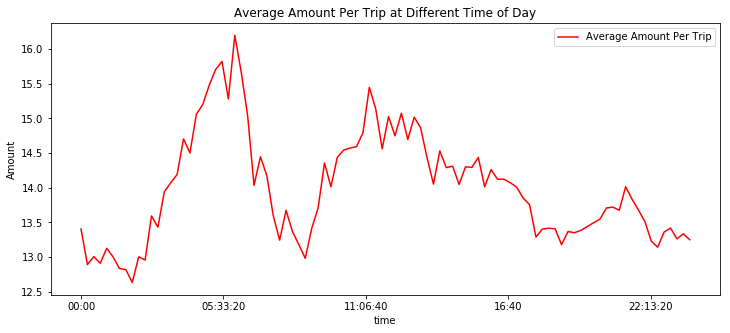

In [30]:
plt.figure(figsize = (12,5))
plt.title('Average Amount Per Trip at Different Time of Day')
plt.plot(income_total_hour['TIME'], income_total_hour['Trip Total'], 'r', label='Average Amount Per Trip')
plt.ylabel('Amount')
plt.legend()
plt.show()

In [13]:
CHI_COORDINATES = (41.881832, -87.623177)
map_chi = folium.Map(location=CHI_COORDINATES, zoom_start=12, prefer_canvas=True)
MAX_RECORDS = 2000
for each in df[0:MAX_RECORDS].iterrows():
    folium.CircleMarker(location=[each[1]['Pickup Centroid Latitude'],each[1]['Pickup Centroid Longitude']],
                        radius=(each[1]['Trip Total']/5)
                 ).add_to(map_chi)
map_chi

This isn't really informative, we can create a heat map from this, but by doing that on all the data doesn't really help achieving our objective. We can however, mark the pickup location but create different map for different time frames. 

On another note, that we don't need the pin-point location of pick-up locations, so here we round the lat and longitude to 3 decimals, since 1 degree of lat/longitude is ~110 km, and thus we have around 100m blocks/areas

In [31]:
df['Pickup Centroid Location'] = df['Pickup Centroid Longitude'].round(3).astype(str) + ',' + df['Pickup Centroid Latitude'].round(3).astype(str)
df.head()

,Trip ID,Trip Start Timestamp,Trip Seconds,Trip Miles,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,TIME,Pickup Centroid Location
1,0377167460a4d5d5e015c642b460e56ac88dab71,2018-11-01 02:00:00,1031.0,5.3,10.0,0,2.5,12.5,False,1,41.745758,-87.708366,NaN,NaN,02:00:00,"-87.708,41.746"
2,03a2ac30a46af881e6a2e6af06a3a779b67c0802,2018-11-01 20:15:00,4125.0,49.9,62.5,0,3.8,66.3,False,1,41.892042,-87.631864,NaN,NaN,20:15:00,"-87.632,41.892"
3,03fe17b0509941aa04744e9e4478ed5ded56b2eb,2018-11-01 03:45:00,1229.0,11.7,7.5,0,2.5,10.0,True,3,41.916005,-87.675095,NaN,NaN,03:45:00,"-87.675,41.916"
5,0415494bfe05371e1a4d18e9813261809b2efd52,2018-11-01 07:30:00,653.0,2.4,5.0,0,2.5,7.5,False,1,41.745758,-87.708366,NaN,NaN,07:30:00,"-87.708,41.746"
6,0483215f5d0fa7c8598ce17f34865e0e55075292,2018-11-01 21:30:00,2142.0,24.1,27.5,5,2.5,35.0,True,1,41.892073,-87.628874,NaN,NaN,21:30:00,"-87.629,41.892"


In [32]:
df['Pickup Centroid Location'].value_counts().head()

-87.633,41.881    41062
-87.903,41.979    30654
-87.621,41.885    24356
-87.632,41.892    23186
-87.657,41.885    22529
Name: Pickup Centroid Location, dtype: int64

In [33]:
unique_loc = pd.DataFrame(df['Pickup Centroid Location'].value_counts().reset_index())
unique_loc.columns = ['unique_locations', 'pickup counts']
unique_loc.head()

,unique_locations,pickup counts
0,"-87.633,41.881",41062
1,"-87.903,41.979",30654
2,"-87.621,41.885",24356
3,"-87.632,41.892",23186
4,"-87.657,41.885",22529


In [34]:
unique_loc['Longitude'], unique_loc['Latitude'] = unique_loc['unique_locations'].str.split(',',1).str
unique_loc = unique_loc.drop(['unique_locations'], axis='columns')

unique_loc.head()

,pickup counts,Longitude,Latitude
0,41062,-87.633,41.881
1,30654,-87.903,41.979
2,24356,-87.621,41.885
3,23186,-87.632,41.892
4,22529,-87.657,41.885


In [35]:
map_chi2 = folium.Map(location=CHI_COORDINATES, zoom_start=11, prefer_canvas=True)
df_reduce = df.iloc[:30000,:]
heat_data = df_reduce[['Pickup Centroid Latitude', 'Pickup Centroid Longitude']].as_matrix()

HeatMap(heat_data, min_opacity=0.6, radius=15).add_to(map_chi2)
map_chi2

C:\Users\nstar\Anaconda2\envs\py37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
